In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install ffmpeg-python


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from zmq.constants import QUEUE
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
from copy import deepcopy


import ffmpeg

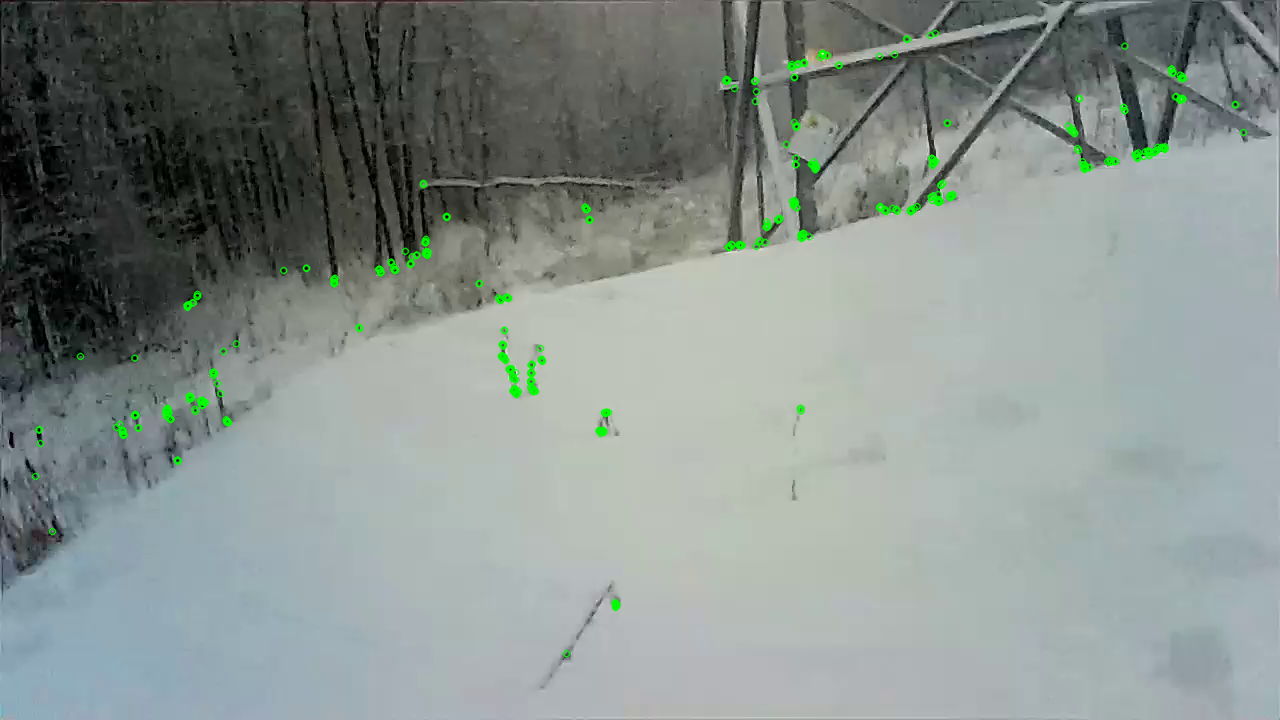

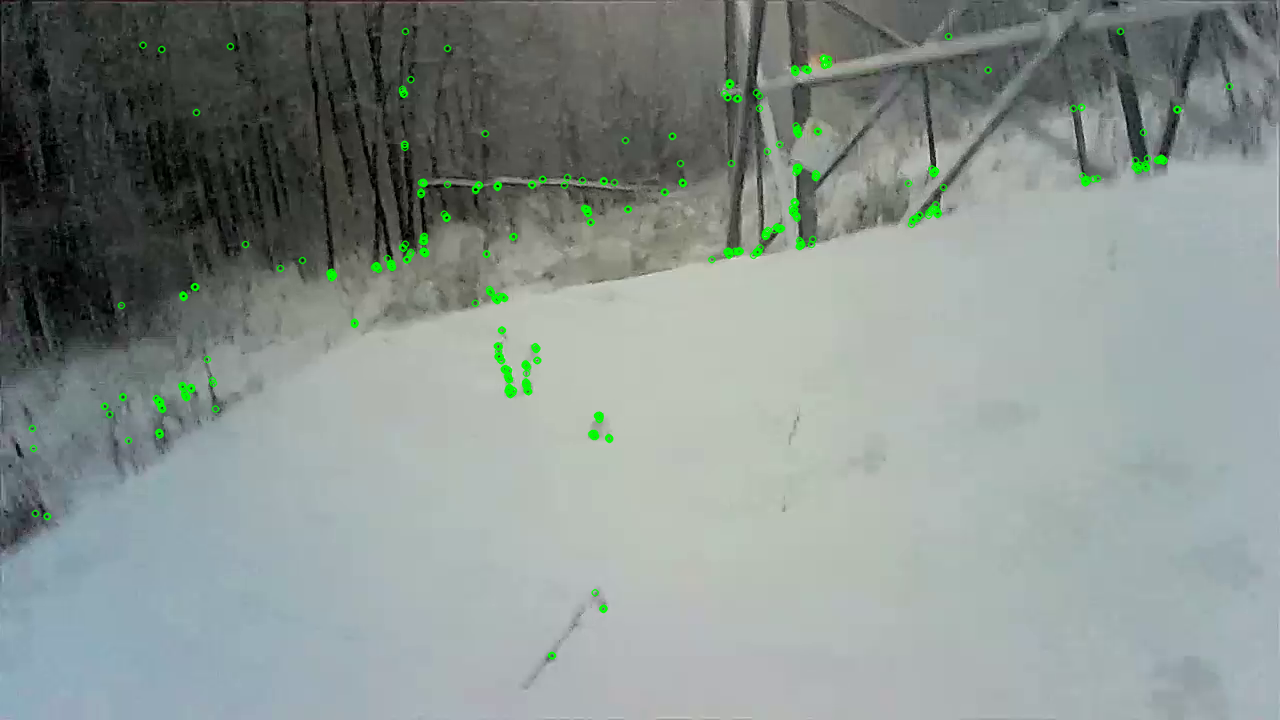

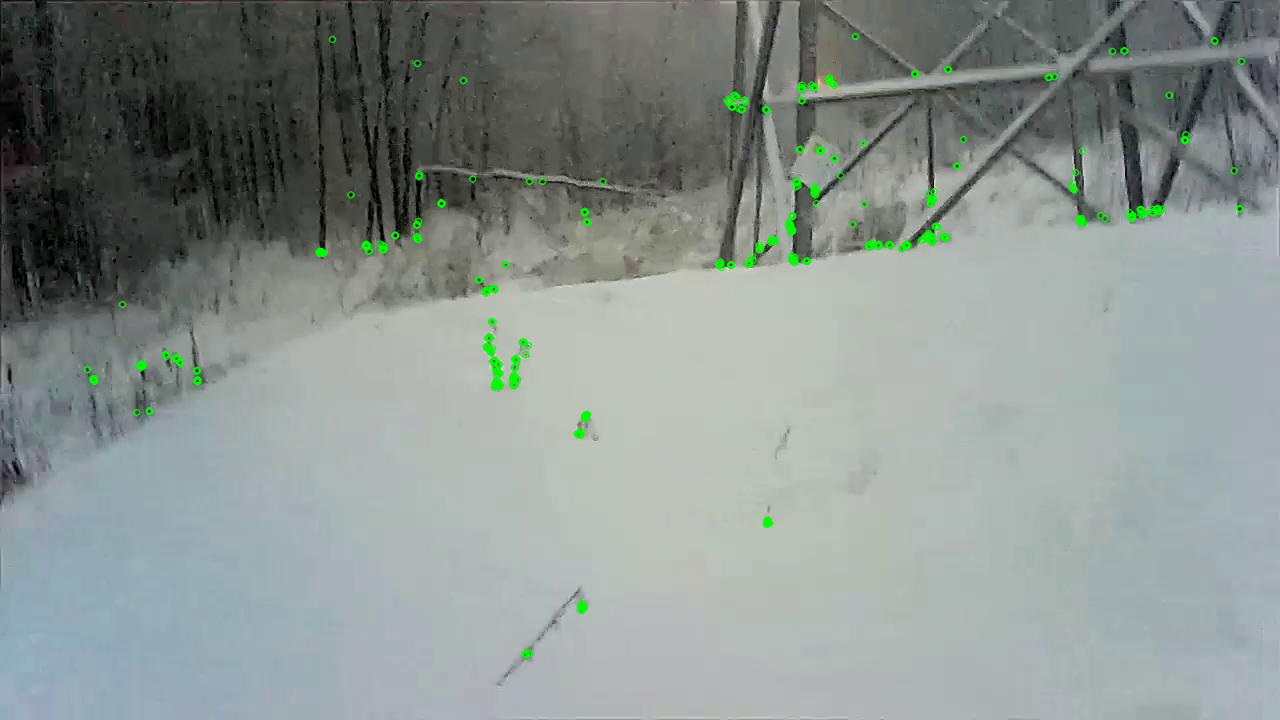

In [4]:
# define a video capture object
vid = cv2.VideoCapture("/content/drive/MyDrive/secou_c/2.mp4")

fourcc = cv2.VideoWriter_fourcc(*'XVID')

w = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))
frameSize = (w, h)

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('FAST_2.mp4',fourcc, 20.0, frameSize)

timer = 30
#orb = cv2.ORB_create(int scoreType=ORB::HARRIS_SCORE)

orb = cv2.ORB_create(
    nfeatures = 500,                    # The maximum number of features to retain.
    scaleFactor = 1.2,                  # Pyramid decimation ratio, greater than 1
    nlevels = 8,                        # The number of pyramid levels.
    edgeThreshold = 31,                 # This is size of the border where the features are not detected. It should roughly match the patchSize parameter
    firstLevel = 0,                     # It should be 0 in the current implementation.
    WTA_K = 2,                          # The number of points that produce each element of the oriented BRIEF descriptor.
    #scoreType = cv2.ORB_HARRIS_SCORE,   # The default HARRIS_SCORE means that Harris algorithm is used to rank features (the score is written to KeyPoint::score and is 
                                        # used to retain best nfeatures features); FAST_SCORE is alternative value of the parameter that produces slightly less stable 
                                        # keypoints, but it is a little faster to compute.
    scoreType = cv2.ORB_FAST_SCORE,
    patchSize = 31,                       # size of the patch used by the oriented BRIEF descriptor. Of course, on smaller pyramid layers the perceived image area covered
                                      # by a feature will be larger.
    fastThreshold = 20 
)

while(timer > 27):
      
    ret, frame = vid.read()  # Take each frame

    if ret == True:
    
        #hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)  # Convert BGR to HSV

        
        # find the keypoints with ORB
        key_point = orb.detect(frame,None)

        # compute the descriptors with ORB
        key_point, des = orb.compute(frame, key_point)

        frame_pointed = cv2.drawKeypoints(frame, key_point, None, color=(0,255,0), flags=0)
        cv2_imshow(frame_pointed)
        out.write(frame_pointed)

        #cv2_imshow(frame_pointed)
      
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    else:
        break
    
    timer -= 1
    
  
# After the loop release the cap object
vid.release()
out.release()
# Destroy all the windows
cv2.destroyAllWindows()